### For the same statistical areas, plot salary of postdocs and salary of everyone else

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)

<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load university rankings and salary info

In [13]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')
len(university_df)

In [15]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56970.141040,56164.312487,49056.118257,49324.797437,48627.110378


Text(0.5, 1.0, 'Real Salary by RPP')

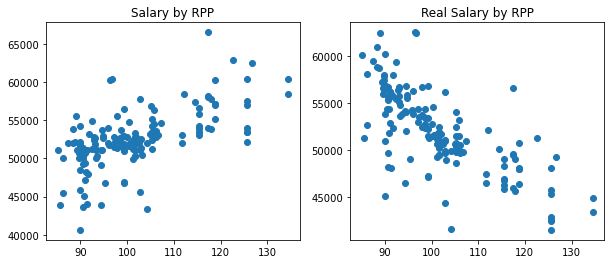

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
axs[0].scatter(
    university_df["RPP_all"].values,
    university_df["MEDIAN_SALARY"].values,
)
axs[1].scatter(
    university_df["RPP_all"].values,
    university_df["REAL_MEDIAN_SALARY"].values,
)
axs[0].set_title('Salary by RPP')
axs[1].set_title('Real Salary by RPP')

### load income

In [18]:
income_df = pd.read_csv(DATA_DIR / 'income' / 'income.csv', skiprows=4)
income_df = income_df[income_df.Description == 'Real per capita personal income (chained (2012) dollars) 2/'] 
income_df["RPI_per_capita"] = income_df["2019"]

In [19]:
income_df[:3]

,GeoFips,GeoName,LineCode,Description,2019,RPI_per_capita
1,00000,United States,2.0,Real per capita personal income (chained (2012...,51424.0,51424.0
3,00999,United States (Nonmetropolitan Portion) 3/,2.0,Real per capita personal income (chained (2012...,45541.0,45541.0
5,10180,"Abilene, TX (Metropolitan Statistical Area)",2.0,Real per capita personal income (chained (2012...,46336.0,46336.0


In [10]:

cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]
cost_of_living_df['RPPs'] = cost_of_living_df['2019']
income_by_COL = cost_of_living_df[['RPPs', 'GeoName']].merge(income_df[['RPI_per_capita', 'GeoName', 'GeoFips']], on='GeoName')
income_by_COL['statistical_area'] = [i.split(' (')[0] for i in income_by_COL.GeoName.values]
income_by_COL[:10]

,RPPs,GeoName,RPI_per_capita,GeoFips,statistical_area
0,100.0,United States,51424.0,00000,United States
1,98.8,United States,51424.0,00000,United States
2,102.0,United States,51424.0,00000,United States
3,100.0,United States,51424.0,00000,United States
4,90.3,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
5,96.0,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
6,80.1,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
7,91.2,"Abilene, TX (Metropolitan Statistical Area)",46336.0,10180,"Abilene, TX"
8,90.0,"Akron, OH (Metropolitan Statistical Area)",52131.0,10420,"Akron, OH"
9,95.9,"Akron, OH (Metropolitan Statistical Area)",52131.0,10420,"Akron, OH"


In [11]:
income_by_COL.GeoFips.values

array(['00000', '00000', '00000', ..., '49740', '49740', '49740'],
      dtype=object)

In [12]:
regional_incomes = []
for idx, row in university_df.iterrows():
    regional_income_2012 = income_by_COL[
        (income_by_COL.GeoFips.values.astype(int) == row.CBSA)
    ].RPI_per_capita.values

    if len(regional_income_2012) > 0:
        regional_incomes.append(regional_income_2012[0])
    else:
        print(row.INSTNM)
        regional_incomes.append(np.nan)

Dartmouth College
Washington State University
Oklahoma State University-Main Campus
Ohio University-Main Campus
University of Wyoming
University of Mississippi
University of Mississippi
Montana State University
Mississippi State University
Louisiana Tech University
University of Idaho
Missouri University of Science and Technology
Michigan Technological University
Clarkson University
Central Alabama Community College
Enterprise State Community College
New Beginning College of Cosmetology
George C Wallace Community College-Dothan
George C Wallace State Community College-Hanceville
George C Wallace State Community College-Selma
Judson College
University of West Alabama
Lurleen B Wallace Community College
Marion Military Institute
Northeast Alabama Community College
Reid State Technical College
Selma University
Snead State Community College
Talladega College
Troy University
Tuskegee University
Bevill State Community College
University of Alaska Southeast
Alaska Vocational Technical Center


College of the Ozarks
Poplar Bluff Technical Career Center
Rolla Technical Institute/Center
Salem College of Hairstyling
American College of Hair Design Inc
Missouri State University-West Plains
State Fair Community College
Three Rivers College
North Central Missouri College
Academy of Cosmetology Inc
Blackfeet Community College
Butte Academy of Beauty Culture
Highlands College of Montana Tech
Crevier's Academy of Cosmetology Arts
Carroll College
Dawson Community College
Chief Dull Knife College
Flathead Valley Community College
Aaniiih Nakoda College
Fort Peck Community College
Helena College University of Montana
Little Big Horn College
Miles Community College
Montana Technological University
Montana State University-Northern
Salish Kootenai College
The University of Montana-Western
Chadron State College
Doane University
Hastings College
University of Nebraska at Kearney
Mid-Plains Community College
Midland University
Nebraska Indian Community College
Northeast Community College
Peru

Wayland Baptist University
Western Texas College
Wharton County Junior College
Evans Hairstyling College-Cedar City
Snow College
Southern Utah University
Uintah Basin Technical College
Bennington College
Castleton University
Community College of Vermont
Goddard College
Northern Vermont University
Marlboro College
Middlebury College
New England Culinary Institute
Norwich University
SIT Graduate Institute
Sterling College
Vermont Law School
Vermont State Colleges-Office of the Chancellor
Vermont Technical College
Averett University
Bluefield College
Dabney S Lancaster Community College
Danville Community College
Eastern Shore Community College
Germanna Community College
Hampden-Sydney College
Longwood University
Sovah School of Health Professions
Mountain Empire Community College
Patrick Henry Community College
Southern Virginia University
Southside Virginia Community College
Southwest Virginia Community College
The University of Virginia's College at Wise
Virginia Military Institute
Was

Eastern West Virginia Community and Technical College
IVAEM College
Pacific Islands University
Shawnee Beauty College
Upper Valley Educators Institute
Huntingdon County Career and Technology Center
New Saint Andrews College
Arkansas State University-Newport
Marlboro College Graduate & Professional Studies
Atenas College
Saginaw Chippewa Tribal College
Texas County Technical College
Susquehanna County Career and Technology Center
Universidad Pentecostal Mizpa
Caribbean Forensic and Technical College
West Virginia Junior College-Bridgeport
Alaska Christian College
Family of Faith Christian University
Colegio Educativo Tecnologico Industrial Inc
Mr John's School of Cosmetology & Nails-Jacksonville
Illinois Eastern Community College-System Office
Triangle Tech Inc-Sunbury
Pierpont Community and Technical College
Dewey University-Hato Rey
Charlie's Guard-Detective Bureau and Academy Inc
Bayamon Community College
Cambridge Technical Institute
Career Beauty College
Escuela Hotelera de San Jua

In [10]:
import cpi

In [11]:
from datetime import date

In [12]:
regional_incomes_inflation_adjusted = [
    cpi.inflate(
        i,
        year_or_month=date(2012, 1, 1),
        to=date(2021, 1, 1),
    )
    for i in regional_incomes
]

In [13]:
len(regional_incomes)

6442

In [14]:
university_df["regional_income"] = regional_incomes_inflation_adjusted

In [15]:
university_df.to_pickle(DATA_DIR/ 'university_ranking_salary_versus_per_capita.pickle')

In [16]:
regional_incomes

[64783.0,
 82718.0,
 64783.0,
 58355.0,
 71668.0,
 56747.0,
 62084.0,
 40536.0,
 49954.0,
 51566.0,
 58099.0,
 51566.0,
 55552.0,
 58355.0,
 55559.0,
 49642.0,
 56747.0,
 59161.0,
 71668.0,
 52751.0,
 58355.0,
 57297.0,
 62619.0,
 47044.0,
 52751.0,
 64141.0,
 41063.0,
 nan,
 59856.0,
 43677.0,
 57363.0,
 52604.0,
 58355.0,
 51566.0,
 57999.0,
 51350.0,
 65888.0,
 43677.0,
 59856.0,
 54119.0,
 64783.0,
 44860.0,
 59013.0,
 50721.0,
 58205.0,
 53318.0,
 49979.0,
 51187.0,
 50331.0,
 51381.0,
 51187.0,
 51566.0,
 53173.0,
 64783.0,
 44743.0,
 42014.0,
 56639.0,
 43561.0,
 58205.0,
 43176.0,
 53173.0,
 53173.0,
 59283.0,
 50120.0,
 58355.0,
 53318.0,
 55217.0,
 53318.0,
 58355.0,
 55530.0,
 53607.0,
 56825.0,
 47521.0,
 56817.0,
 52426.0,
 58355.0,
 55552.0,
 43146.0,
 50985.0,
 53173.0,
 44985.0,
 52180.0,
 45463.0,
 48499.0,
 45530.0,
 41863.0,
 58205.0,
 56747.0,
 36155.0,
 58377.0,
 50930.0,
 49374.0,
 55284.0,
 47946.0,
 53173.0,
 53173.0,
 43681.0,
 58099.0,
 40247.0,
 58099.0,
 561

In [17]:
university_df[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722


In [18]:
np.sum(university_df.N_SALARIES)

28161

In [19]:
university_df = university_df[university_df.N_SALARIES > 10]

In [20]:
len(university_df)

165

In [21]:
import seaborn as sns